# Жиделев Сергей Николаевич
# РИ-401002

Импортируем необходимые библиотеки и модули

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Читаем данные

In [118]:
df = pd.read_csv('Dlya_laby.csv')
df.drop(['Адрес', 'index'], axis = 1, inplace = True)
df.tail()

,Количество транзакций,Количество исходящих транзакций,Количество входящих транзакций,Среднее количество транзакций в день,Средний размер транзакции,Медиана размера транзакций,Дисперсия размера транзакций,Средний размер исходящей транзакции,Средний размер входящей транзакции,Медиана размера исходящей транзакций,...,nкnв,1к1и,1к2и,1кnи,nк1и,nк2и,nкnи,max_in,max_out,default
41693,2,1,1,0.001279,98667550.0,98667550.0,0.0,98667550.0,98667550.0,98667550.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,5,0
41694,2,1,1,0.001279,39089823.0,39089823.0,0.0,39089823.0,39089823.0,39089823.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0
41695,2,1,1,0.001279,100000000.0,100000000.0,0.0,100000000.0,100000000.0,100000000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,0
41696,2,1,1,0.001280,99982146.0,99982146.0,0.0,99982146.0,99982146.0,99982146.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,5,0
41697,2,1,1,0.001280,44203306.0,44203306.0,0.0,44203306.0,44203306.0,44203306.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,2,0


При просмотре данных, были откинуты две колонки, которые не будут играть роли при обучении модели: Адрес и index

# Обучение моделей

<h4><p style="color: purple">
Дальше для обучения моделей данные нужно стандартизировать, берём для этого MinMaxScaler</p></h4>

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
d = MinMaxScaler().fit(X = df.drop('default', axis = 1)).transform(df.drop('default', axis = 1))

<h4><p style="color: purple">Разбиваем данные на тренировочные и тестовые</p></h4>

In [121]:
X_train, X_test, y_train, y_test = train_test_split(d, df['default'], test_size = 0.2)

<h4><p style="color: purple">Обучаем Логистическую регрессию</p></h4>

In [122]:
lg = LogisticRegression(penalty = 'l2')
lg.fit(X_train, y_train)
print(classification_report(y_test, lg.predict(X_test), labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      4213
           1       0.80      0.93      0.86      4127

    accuracy                           0.85      8340
   macro avg       0.85      0.85      0.84      8340
weighted avg       0.86      0.85      0.84      8340



<h4><p style="color: purple">Обучаем кластер</p></h4>

In [123]:
neigh = KNeighborsClassifier()
param = {'n_neighbors':range(3, 10), 'weights':['uniform', 'distance']}
gsv = GridSearchCV(neigh, param_grid = param)
gsv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 10),
                         'weights': ['uniform', 'distance']})

In [124]:
print(classification_report(y_test, gsv.best_estimator_.predict(X_test), labels = [0, 1]))
gsv.best_params_

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4213
           1       0.91      0.95      0.93      4127

    accuracy                           0.93      8340
   macro avg       0.93      0.93      0.93      8340
weighted avg       0.93      0.93      0.93      8340



{'n_neighbors': 6, 'weights': 'distance'}

In [125]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('default', axis = 1), df['default'], test_size = 0.2)

<h4><p style="color: purple">Обучаем дерево</p></h4>

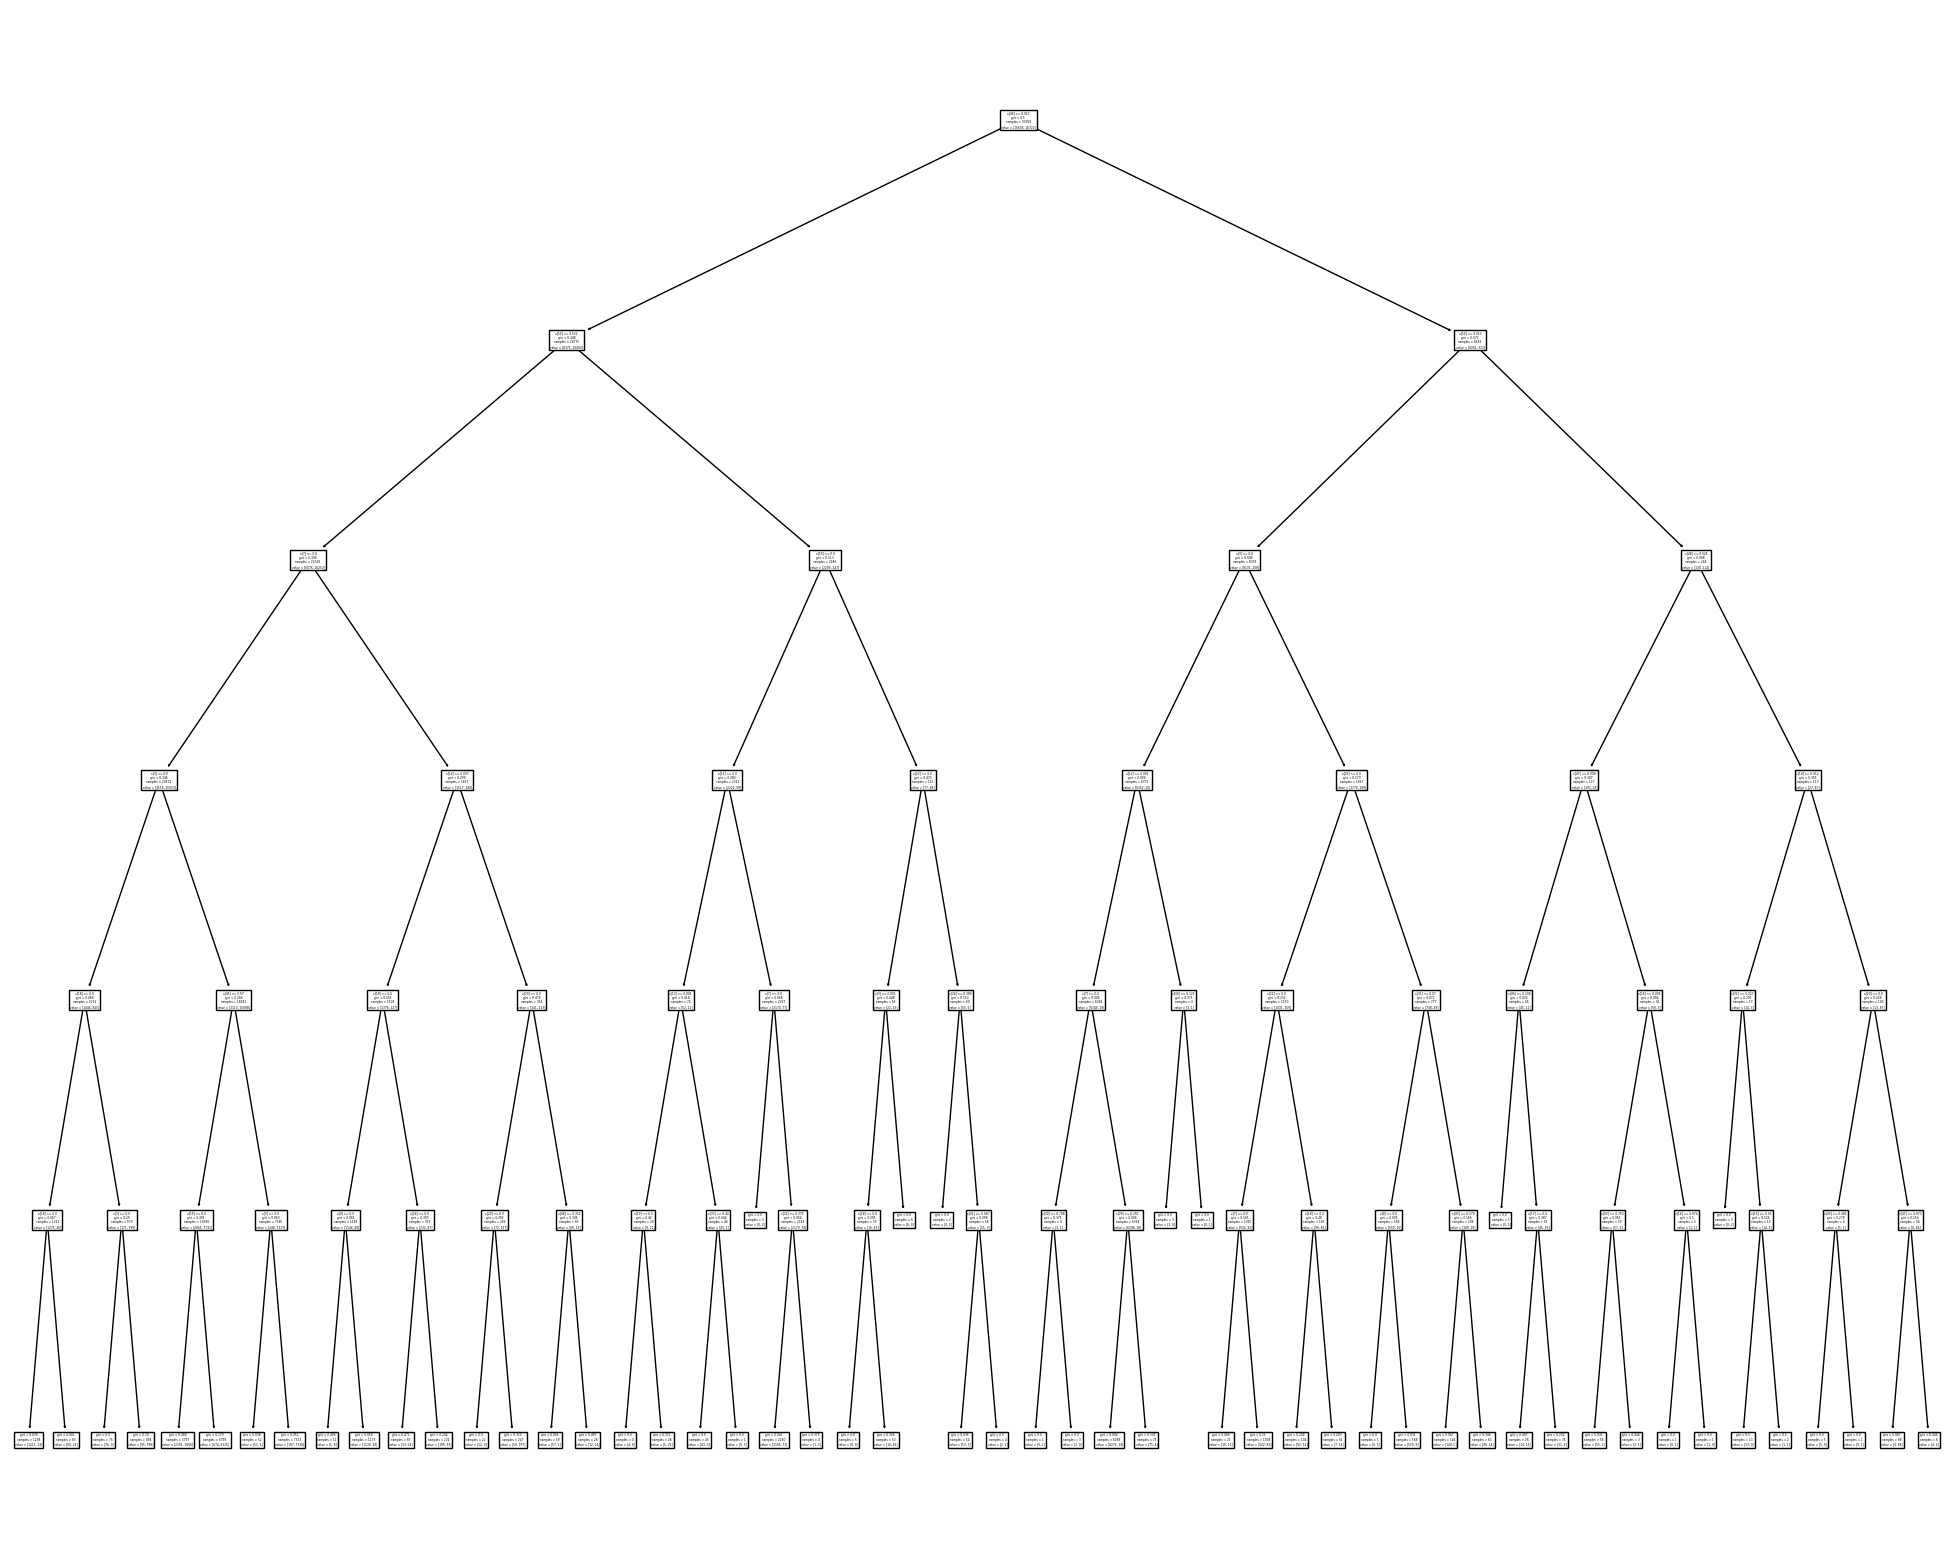

In [126]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc)

In [127]:
print(classification_report(y_test, dtc.predict(X_test), labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4213
           1       0.93      0.88      0.90      4127

    accuracy                           0.91      8340
   macro avg       0.91      0.91      0.91      8340
weighted avg       0.91      0.91      0.91      8340



<h4><p style="color: purple">Обучаем классификатор деревьев-ансамблей</p></h4>

In [128]:
rf = RandomForestClassifier()
param = {'n_estimators':range(200, 201), 'criterion':['entropy', 'gini'], 'max_depth': range(5, 8)}
gsv = RandomizedSearchCV(rf, param_distributions = param, n_jobs = 2)
gsv.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 8),
                                        'n_estimators': range(200, 201)})

In [129]:
print(classification_report(y_test, gsv.best_estimator_.predict(X_test), labels = [0, 1]))
gsv.best_params_

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4213
           1       0.95      0.95      0.95      4127

    accuracy                           0.95      8340
   macro avg       0.95      0.95      0.95      8340
weighted avg       0.95      0.95      0.95      8340



{'n_estimators': 200, 'max_depth': 7, 'criterion': 'gini'}

<h4><p style="color: purple">Обучаем на градиентом бустинге</p></h4>

In [ ]:
'criterion':['friedman_mse', 'squared_error'], 'loss': ['log_loss']

In [136]:
gb = GradientBoostingClassifier()
param = {'n_estimators':range(120, 150, 10), 'max_depth':range(5, 8)}
gsv = RandomizedSearchCV(gb, param, n_jobs = 2)
gsv.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=2,
                   param_distributions={'max_depth': range(5, 8),
                                        'n_estimators': range(120, 150, 10)})

In [137]:
print(classification_report(y_test, gsv.best_estimator_.predict(X_test), labels = [0, 1]))
gsv.best_params_

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4213
           1       0.98      0.97      0.98      4127

    accuracy                           0.98      8340
   macro avg       0.98      0.98      0.98      8340
weighted avg       0.98      0.98      0.98      8340



{'n_estimators': 130, 'max_depth': 7}

Все гиперпараметры моделей МО были подобраны при помощи GridSearchCV и RandomizedSearchCV(этот парамезатор был выбран, чтобы ускорить перебор параметров модели).